In [2]:
#import the necessary libraries
import yfinance as yf
import os
from dotenv import load_dotenv
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred
from ipywidgets import interact, widgets
import pygal
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
from bokeh.io import show, output_notebook
from bokeh.layouts import row, widgetbox
from bokeh.models import ColumnDataSource, Select
from bokeh.plotting import figure

In [3]:
# Load .env enviroment variables
load_dotenv(r"example.env")

True

In [4]:
# API Key
fred = Fred(api_key = os.getenv("API_KEY"))

## Question 1
## How does Bitcoin perform as a hedge during bear markets when compared to the US 10 year T-Bills?

In [7]:
# Get data for Bitcoin and USA 10 year T-Bills 
btc = yf.Ticker("BTC-USD").history(period="max")
tbill = yf.Ticker("^TNX").history(period="max")
btc.index = pd.to_datetime(btc.index).date
tbill.index = pd.to_datetime(tbill.index).date

In [8]:
#Set to and from dates
to_date = '01-01-2023'
from_date = '01-01-1960'

# Setup descriptor ID's and get 10 year T-Bills data for all the major world economies
japan_10y = fred.get_series('IRLTLT01JPM156N',observation_start = from_date, observation_end = to_date)
usa_10y = fred.get_series('DGS10',observation_start = from_date, observation_end = to_date)
canada_10y = fred.get_series('IRLTLT01CAM156N', observation_start = from_date, observation_end = to_date)
uk_10y = fred.get_series('IRLTLT01GBM156N',observation_start = from_date, observation_end = to_date)
euro_10y= fred.get_series('IRLTLT01EZM156N',observation_start = from_date, observation_end = to_date)
india_10y = fred.get_series('INDIRLTLT01STM',observation_start = from_date, observation_end = to_date)
australia_10y = fred.get_series('IRLTLT01AUM156N',observation_start = from_date, observation_end = to_date)
germany_10y = fred.get_series('IRLTLT01DEM156N', observation_start = from_date, observation_end = to_date)
brazil_10y = fred.get_series('INTGSTBRM193N', observation_start = from_date, observation_end = to_date)
france_10y = fred.get_series('IRLTLT01FRM156N',observation_start = from_date, observation_end = to_date)
southafrica_10y = fred.get_series('IRLTLT01ZAM156N',observation_start = from_date, observation_end = to_date)
russia_10y = fred.get_series('IRLTLT01RUM156N',observation_start = from_date, observation_end = to_date)

In [44]:
china_10y = pd.read_csv(r'China 10-Year Bond Yield Historical Data.csv')
egypt_10y = pd.read_csv(r'China 10-Year Bond Yield Historical Data.csv')
nigeria_10y = pd.read_csv(r'Nigeria 10-Year Bond Yield Historical Data.csv')

In [45]:
china_10y = china_10y.set_index('Date')
egypt_10y = egypt_10y.set_index('Date')
nigeria_10y = nigeria_10y.set_index('Date')

In [11]:
# Create dataframe with both datasets
data = pd.concat([btc["Close"], tbill["Close"]], axis=1)
data.columns = ["Bitcoin", "10 Year T-Bills"]
data = data.dropna(how='any')
data

,Bitcoin,10 Year T-Bills
2014-09-17,457.334015,2.600
2014-09-18,424.440002,2.629
2014-09-19,394.795990,2.587
2014-09-22,402.152008,2.566
2014-09-23,435.790985,2.535
...,...,...
2023-01-18,20688.781250,3.375
2023-01-19,21086.792969,3.397
2023-01-20,22676.552734,3.484
2023-01-23,22934.431641,3.525


In [12]:
# Calculate returns for both datasets
data["Bitcoin Returns"] = data["Bitcoin"].pct_change()
data["T-Bill Returns"] = data["10 Year T-Bills"].pct_change()
data["Bitcoin Returns"]

2014-09-17         NaN
2014-09-18   -0.071926
2014-09-19   -0.069843
2014-09-22    0.018632
2014-09-23    0.083647
                ...   
2023-01-18   -0.022340
2023-01-19    0.019238
2023-01-20    0.075391
2023-01-23    0.011372
2023-01-24   -0.006478
Name: Bitcoin Returns, Length: 2101, dtype: float64

In [13]:
# Find bear market periods for S&P 500 index
sp500 = yf.Ticker("^GSPC").history(period="max")
sp500.index = pd.to_datetime(sp500.index).date
sp500_returns = sp500["Close"].pct_change()
bear_markets = sp500_returns[sp500_returns < 0]
bear_markets

1928-01-04   -0.002252
1928-01-05   -0.009594
1928-01-09   -0.009060
1928-01-10   -0.007429
1928-01-11   -0.001151
                ...   
2023-01-09   -0.000768
2023-01-17   -0.002030
2023-01-18   -0.015563
2023-01-19   -0.007638
2023-01-24   -0.000712
Name: Close, Length: 11072, dtype: float64

In [14]:
# Find corresponding returns for Bitcoin and T-Bills during bear market periods
btc_bear_returns = data["Bitcoin Returns"].loc[data.index.isin(bear_markets.index)]
tbill_bear_returns = data["T-Bill Returns"].loc[data.index.isin(bear_markets.index)]

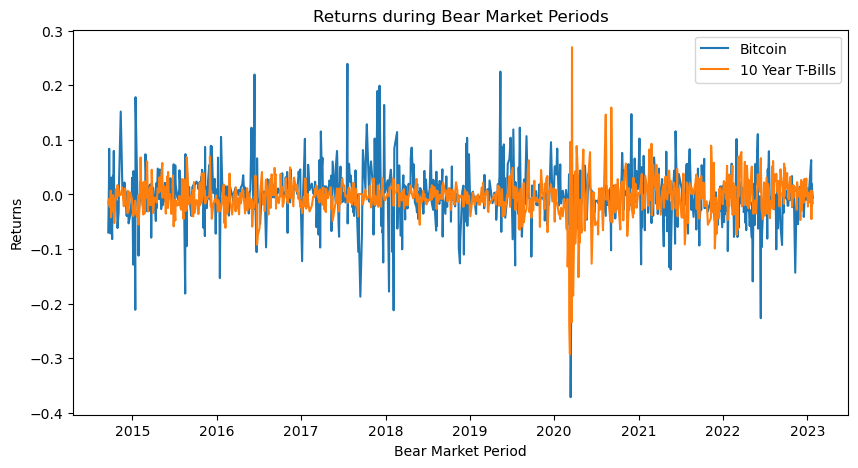

In [15]:
# Plot returns during bear market periods
plt.figure(figsize=(10,5))
plt.plot(btc_bear_returns, label="Bitcoin")
plt.plot(tbill_bear_returns, label="10 Year T-Bills")
plt.legend()
plt.xlabel("Bear Market Period")
plt.ylabel("Returns")
plt.title("Returns during Bear Market Periods")
plt.show()

In [16]:
#Export to SVG
line_chart = pygal.Line()
line_chart.title = 'Returns during Bear Market Periods'
line_chart.x_labels = range(len(btc_bear_returns))
line_chart.add('Bitcoin', btc_bear_returns)
line_chart.add('10 Year T-Bills', tbill_bear_returns)
line_chart.render_to_file('chart.svg')

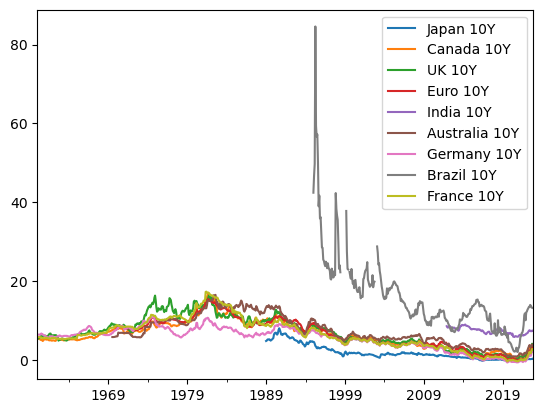

In [17]:
japan_10y.plot(label="Japan 10Y")
canada_10y.plot(label="Canada 10Y")
uk_10y.plot(label="UK 10Y")
euro_10y.plot(label="Euro 10Y")
india_10y.plot(label="India 10Y")
australia_10y.plot(label="Australia 10Y")
germany_10y.plot(label="Germany 10Y")
brazil_10y.plot(label="Brazil 10Y")
france_10y.plot(label="France 10Y")
plt.legend()
plt.show()

In [31]:
#Export SVG
line_chart = pygal.Line()
line_chart.title = '10 Year Bond Yields'
line_chart.x_labels = map(str, range(2010, 2021))
line_chart.add('Japan', japan_10y)
line_chart.add('Canada', canada_10y)
line_chart.add('UK', uk_10y)
line_chart.add('Euro', euro_10y)
line_chart.add('India', india_10y)
line_chart.add('Australia', australia_10y)
line_chart.add('Germany', germany_10y)
line_chart.add('Brazil', brazil_10y)
line_chart.add('France', france_10y)
line_chart.render_to_file('10y_bond_yields.svg')

In [59]:
cen_data = pd.concat([china_10y["Price"], egypt_10y["Price"], nigeria_10y["Price"]], axis= 1, keys = ['China_Price', 'Egypt_Price', 'Nigeria_Price'])

In [63]:
print(cen_data)


              China_Price  Egypt_Price  Nigeria_Price
Date                                                 
Dec 22, 2021        2.843        2.843         12.599
Dec 21, 2021        2.863        2.863         12.598
Dec 20, 2021        2.858        2.858         12.598
Dec 17, 2021        2.856        2.856         12.597
Dec 16, 2021        2.860        2.860         12.597
...                   ...          ...            ...
Feb 12, 2008          NaN          NaN         10.627
Feb 11, 2008          NaN          NaN         10.618
Feb 08, 2008          NaN          NaN         10.644
Feb 07, 2008          NaN          NaN         10.616
Feb 06, 2008          NaN          NaN         10.597

[5414 rows x 3 columns]


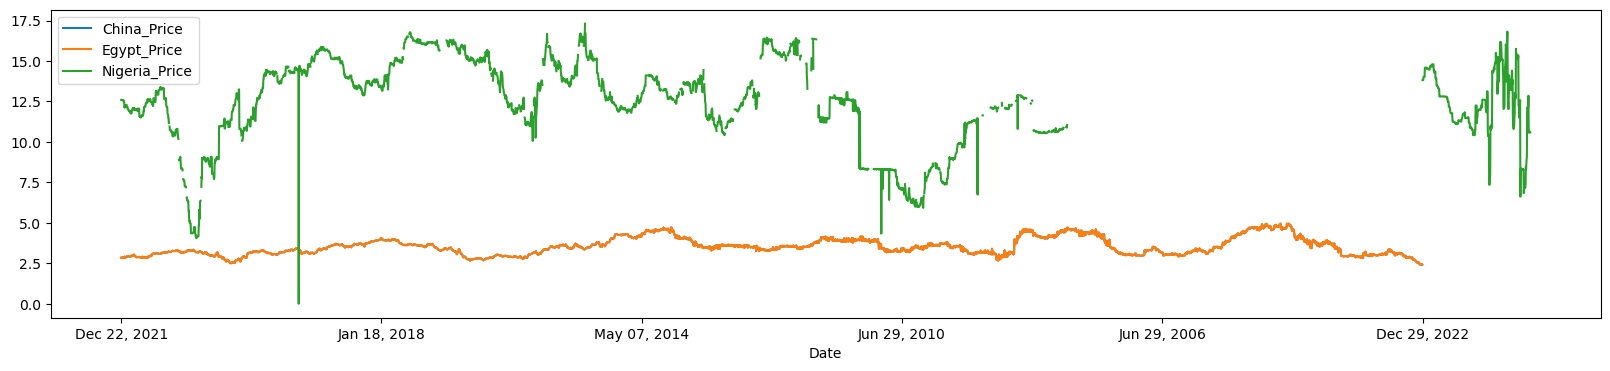

In [64]:
cen_data.plot(label="China, Egypt & Nigeria 10Y",figsize=(20, 4))
plt.legend()
plt.show()

In [65]:
# Create a list of assets
Countries = ["usa_10y", "canada_10y", "brazil_10y", "euro_10y"]
# Define a function that plots the closing prices for the selected asset
def plot_prices(Countries):
    if Countries == "usa_10y":
        usa_10y.plot()
    elif Countries == "canada_10y":
        canada_10y.plot()
    elif Countries == "brazil_10y":
        brazil_10y.plot()
    elif Countries == "euro_10y":
        euro_10y.plot()
    plt.legend([Countries])
    plt.show()
interact(plot_prices, Countries=widgets.Dropdown(options=Countries))

interactive(children=(Dropdown(description='Countries', options=('usa_10y', 'canada_10y', 'brazil_10y', 'euro_…

<function __main__.plot_prices(Countries)>

## Question 2:
## Does Gold really act as a hedge during bear markets or are there better alternatives to gold as an asset class during times of economic turmoil?

In [20]:
# Fetch historical data for gold (GLD) and S&P 500 (SPY)
gold_data = yf.download("GLD", start="2000-01-01")
sp_data = yf.download("SPY", start="2000-01-01")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [21]:
# Fetch historical data for US Treasury bonds (TLT) and cash (BIL)
tlt_data = yf.download("TLT", start="2000-01-01")
bil_data = yf.download("BIL", start="2000-01-01")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [22]:
# Fetch historical data for crude oil (CL=F), Bitcoin (BTC-USD), and US House Pricing Index (HPI)
oil_data = yf.download("CL=F", start="2000-01-01")
btc_data = yf.download("BTC-USD", start="2000-01-01")
hpi_data = yf.download("HPI", start="2000-01-01")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


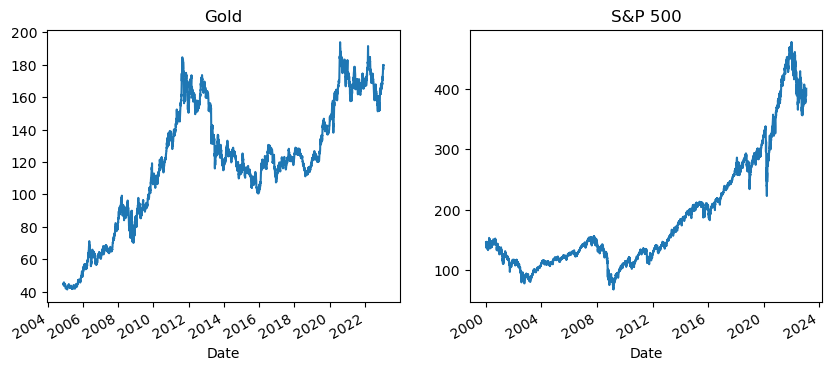

In [90]:
# create a figure and axes for the first chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# plot the gold data on the first axes
gold_data["Close"].plot(ax=ax1, label="Gold")
ax1.set_title("Gold")

# plot the S&P 500 data on the second axes
sp_data["Close"].plot(ax=ax2, label="S&P 500")
ax2.set_title("S&P 500")

# display the charts
plt.show()

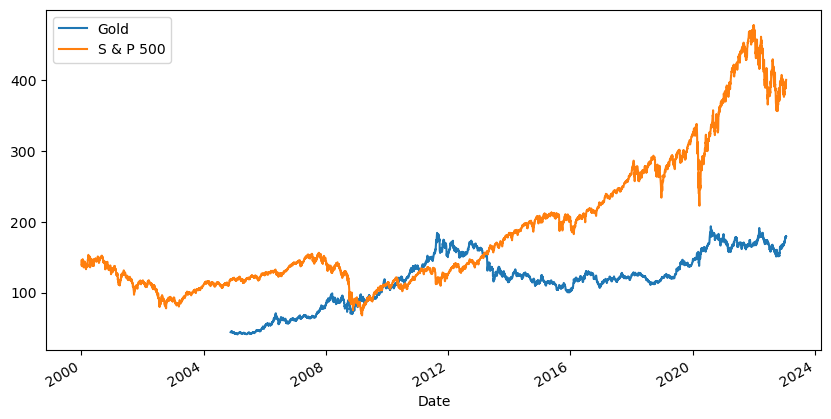

In [132]:
# Plot the closing prices for gold and S&P 500
gold_data["Close"].plot(label="Gold",figsize=(10, 5))
sp_data["Close"].plot(label="S & P 500")
plt.legend()
plt.show()

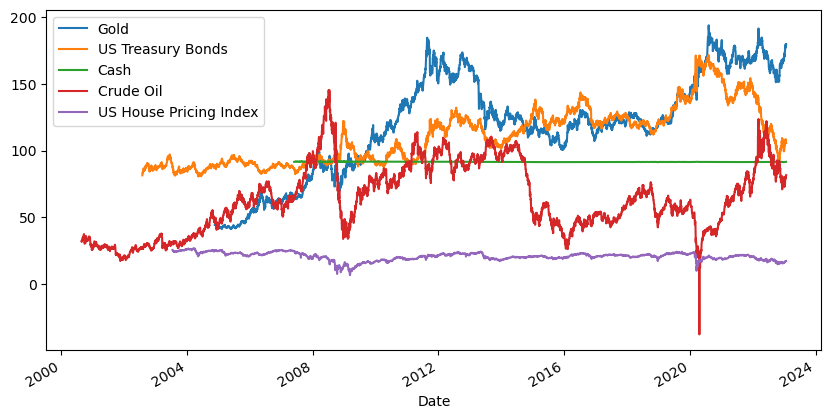

In [121]:
# Plot the closing prices for gold, US Treasury Bonds, cash, crude oil, and US House Pricing Index
gold_data["Close"].plot(label="Gold", figsize=(10, 5))
tlt_data["Close"].plot(label="US Treasury Bonds")
bil_data["Close"].plot(label="Cash")
oil_data["Close"].plot(label="Crude Oil")
#btc_data["Close"].plot(label="Bitcoin")
hpi_data["Close"].plot(label="US House Pricing Index")
plt.legend()
plt.show()

In [27]:
#Export to SVG
line_chart = pygal.Line()
line_chart.title = 'Closing Prices'
line_chart.x_labels = gold_data.index
line_chart.add('Gold', gold_data["Close"])
line_chart.add('US Treasury Bonds', tlt_data["Close"])
line_chart.add('Cash', bil_data["Close"])
line_chart.add('Crude Oil', oil_data["Close"])
#line_chart.add('Bitcoin', btc_data["Close"])
line_chart.add('US House Pricing Index', hpi_data["Close"])
line_chart.render_to_file('closing_prices.svg')

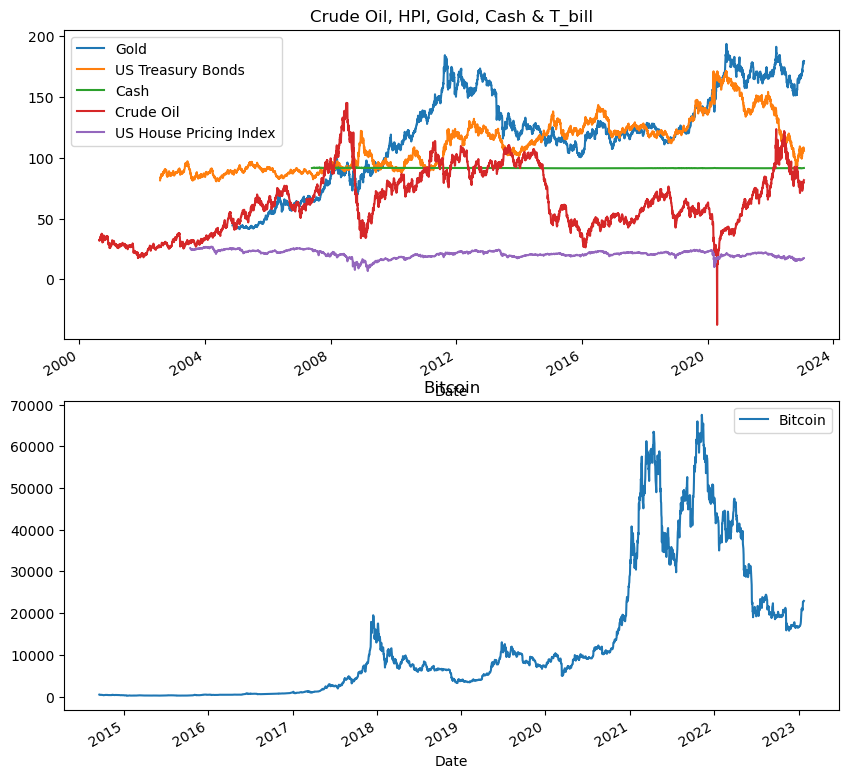

In [122]:
# Plot the closing prices for gold, US Treasury Bonds, cash, crude oil, Bitcoin, and US House Pricing Index
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# plot the gold data on the first axes
gold_data["Close"].plot(ax=ax1, label="Gold")
tlt_data["Close"].plot(ax=ax1, label="US Treasury Bonds")
bil_data["Close"].plot(ax=ax1, label="Cash")
oil_data["Close"].plot(ax=ax1, label="Crude Oil")
hpi_data["Close"].plot(ax=ax1, label="US House Pricing Index")
ax1.set_title("Crude Oil, HPI, Gold, Cash & T_bill")
ax1.legend()

# plot the bitcoin data on the second axes
btc_data["Close"].plot(ax=ax2, label="Bitcoin")
ax2.set_title("Bitcoin")
ax2.legend()

# display the charts
plt.show()

In [123]:
# Create a list of assets
assets = ["Gold", "US Treasury Bonds", "Cash", "Crude Oil", "Bitcoin", "US House Pricing Index"]

In [124]:
# Define a function that plots the closing prices for the selected asset
def plot_prices(asset):
    if asset == "Gold":
        gold_data["Close"].plot()
    elif asset == "US Treasury Bonds":
        tlt_data["Close"].plot()
    elif asset == "Cash":
        bil_data["Close"].plot()
    elif asset == "Crude Oil":
        oil_data["Close"].plot()
    elif asset == "Bitcoin":
        btc_data["Close"].plot()
    elif asset == "US House Pricing Index":
        hpi_data["Close"].plot()
    plt.legend([asset])
    plt.show()

In [125]:
# Create a dropdown menu that allows you to select an asset
interact(plot_prices, asset=widgets.Dropdown(options=assets))

interactive(children=(Dropdown(description='asset', options=('Gold', 'US Treasury Bonds', 'Cash', 'Crude Oil',…

<function __main__.plot_prices(asset)>

# Calculate the daily returns

In [79]:
# Calculate the daily returns 
gold_returns = gold_data['Adj Close'].pct_change()
tlt_returns = tlt_data['Adj Close'].pct_change()
oil_returns = oil_data['Adj Close'].pct_change()
hpi_returns = hpi_data['Adj Close'].pct_change()
btc_returns = btc_data['Adj Close'].pct_change()

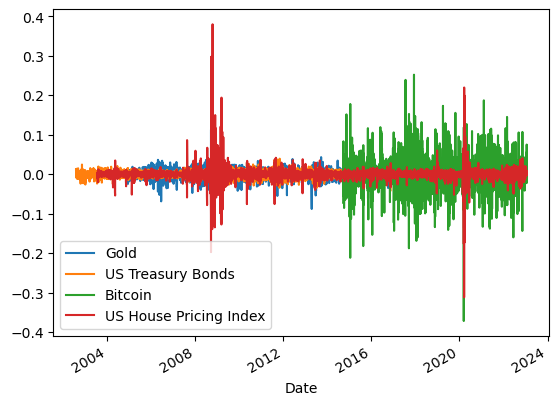

In [82]:
# Plot the daily returns for gold, US Treasury Bonds, BTC and US House Pricing Index
gold_returns.plot(label="Gold")
tlt_returns.plot(label="US Treasury Bonds")
#oil_returns.plot(label="Crude Oil")
btc_returns.plot(label="Bitcoin")
hpi_returns.plot(label="US House Pricing Index")
plt.legend()
plt.show()

In [39]:
# download data Bitcoin and T_Bill
bitcoin = yf.download("BTC-USD", start="2020-01-01", end="2020-12-31")
t_bill = yf.download("^TNX", start="2020-01-01", end="2020-12-31")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [40]:
bitcoin.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-26,24677.015625,26718.070312,24522.689453,26437.037109,26437.037109,48332647295
2020-12-27,26439.373047,28288.839844,25922.769531,26272.294922,26272.294922,66479895605
2020-12-28,26280.822266,27389.111328,26207.640625,27084.808594,27084.808594,49056742893
2020-12-29,27081.810547,27370.720703,25987.298828,27362.437500,27362.437500,45265946774
2020-12-30,27360.089844,28937.740234,27360.089844,28840.953125,28840.953125,51287442704


In [42]:
# clean and organize data
bitcoin = bitcoin.dropna()
t_bill = t_bill.dropna()

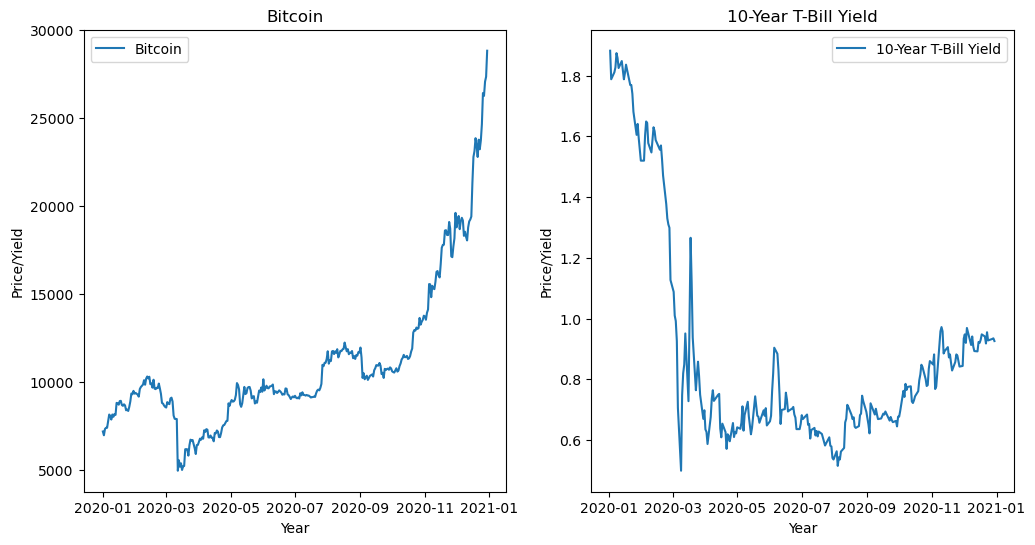

In [117]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

# plot the bitcoin data on the first subplot
plt.sca(ax1)
plt.plot(bitcoin["Close"], label="Bitcoin")
plt.xlabel("Year")
plt.ylabel("Price/Yield")
plt.title("Bitcoin")
plt.legend()

# plot the 10-year T-Bill Yield data on the second subplot
plt.sca(ax2)
plt.plot(t_bill["Close"], label="10-Year T-Bill Yield")
plt.xlabel("Year")
plt.ylabel("Price/Yield")
plt.title("10-Year T-Bill Yield")
plt.legend()

# display the charts
plt.show()

## Question 3:
## Is there a correlation between the prices of Bitcoin and 10-year T-Bills?

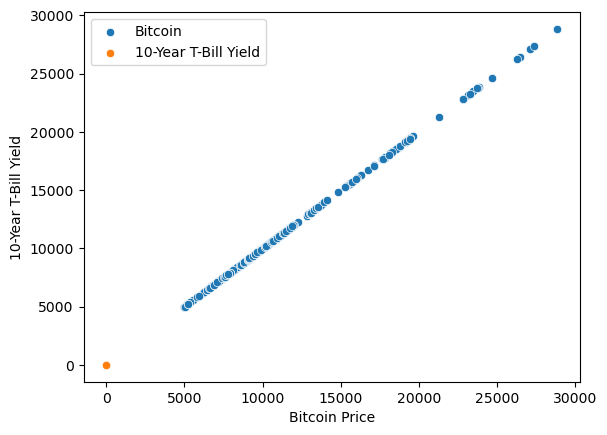

In [126]:
# Using the seaborn library, you can create a scatter plot to compare the relationship between Bitcoin and the 10-Year T-Bill Yield

sns.scatterplot(x="Close", y="Close", data=bitcoin, label="Bitcoin")
sns.scatterplot(x="Close", y="Close", data=t_bill, label="10-Year T-Bill Yield")
plt.xlabel("Bitcoin Price")
plt.ylabel("10-Year T-Bill Yield")
plt.legend()
plt.show()

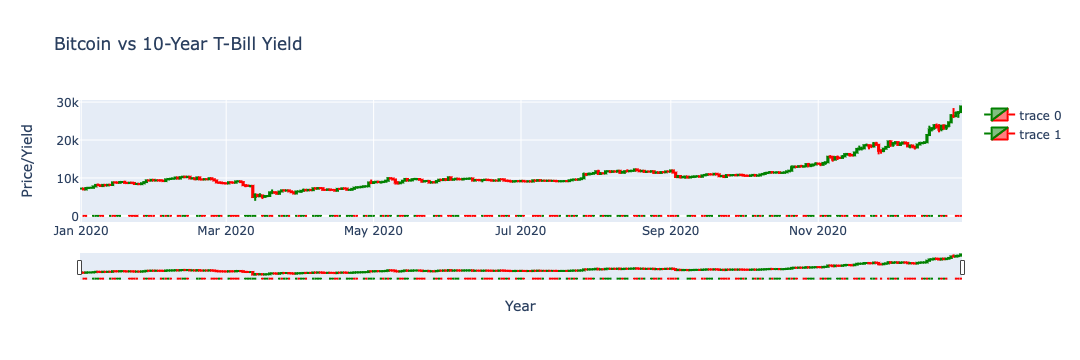

In [127]:
fig = go.Figure(data=[go.Candlestick(x=bitcoin.index,
                open=bitcoin["Open"],
                high=bitcoin["High"],
                low=bitcoin["Low"],
                close=bitcoin["Close"],
                increasing_line_color= 'green', decreasing_line_color= 'red'),
    go.Candlestick(x=t_bill.index,
                open=t_bill["Open"],
                high=t_bill["High"],
                low=t_bill["Low"],
                close=t_bill["Close"],
                increasing_line_color= 'green', decreasing_line_color= 'red')])

fig.update_layout(title='Bitcoin vs 10-Year T-Bill Yield', xaxis_title='Year', yaxis_title='Price/Yield')
fig.show()


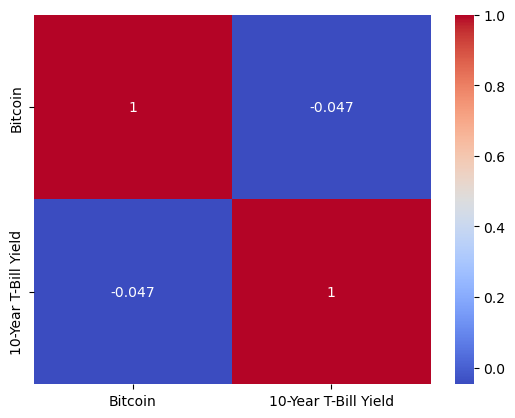

In [129]:
# Plot a heatmap of the correlation matrix to visualize the correlation between different variables.
df = pd.concat([bitcoin["Close"], t_bill["Close"]], axis=1)
df.columns = ["Bitcoin", "10-Year T-Bill Yield"]

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

## Question 4:
## How are the prices of Bitcoin affected as the institutionalized cost of borrowing increases?

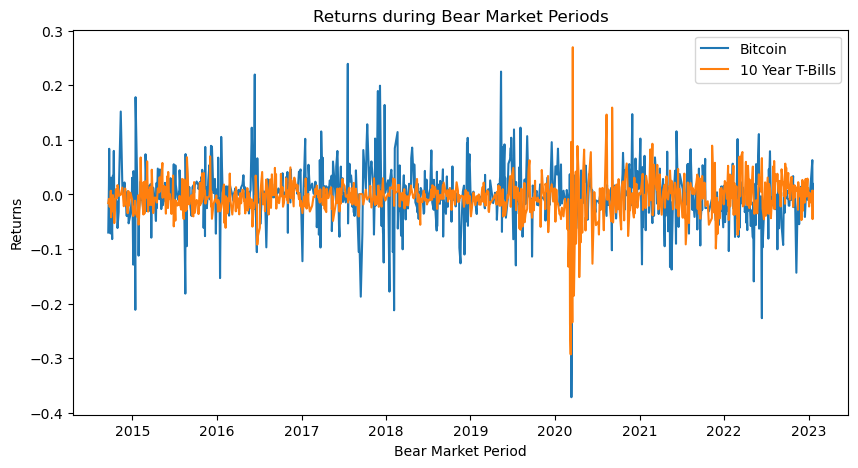

In [130]:
# Plot returns during bear market periods
plt.figure(figsize=(10,5))
plt.plot(btc_bear_returns, label="Bitcoin")
plt.plot(tbill_bear_returns, label="10 Year T-Bills")
plt.legend()
plt.xlabel("Bear Market Period")
plt.ylabel("Returns")
plt.title("Returns during Bear Market Periods")
plt.show()

## Question 5:
## Is there any correlation between any 3 asset classes during bear markets?



In [63]:
# Define the asset classes to analyze
asset_classes = ['SPY', '^TNX', 'CL=F', 'GLD', 'BTC-USD']

In [64]:
data = yf.download(asset_classes, start='2010-01-01', end='2020-12-31')


[*********************100%***********************]  5 of 5 completed


In [65]:
# Calculate the daily returns for each asset class
returns = data['Adj Close'].pct_change()

# Calculate the correlation matrix for the asset classes
corr_matrix = returns.corr()

In [66]:
# Print the correlation matrix
print(corr_matrix)

          BTC-USD      CL=F       GLD       SPY      ^TNX
BTC-USD  1.000000  0.039237  0.093573  0.121005  0.011658
CL=F     0.039237  1.000000  0.037474  0.174145  0.118716
GLD      0.093573  0.037474  1.000000  0.021355 -0.224793
SPY      0.121005  0.174145  0.021355  1.000000  0.432088
^TNX     0.011658  0.118716 -0.224793  0.432088  1.000000


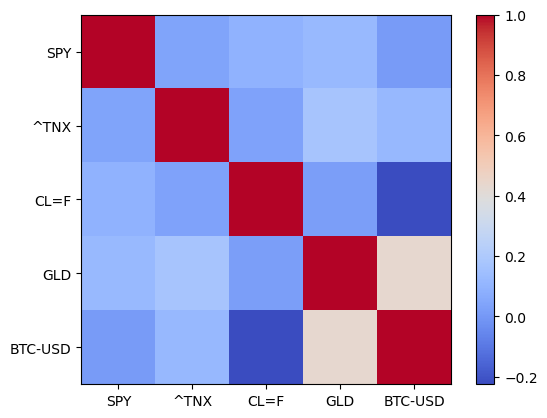

In [67]:
# Plot the correlation matrix as a heatmap
plt.imshow(corr_matrix, cmap='coolwarm')
plt.colorbar()
plt.xticks(np.arange(len(asset_classes)), asset_classes)
plt.yticks(np.arange(len(asset_classes)), asset_classes)
plt.show()

## Question 6:
## What impact do hedging strategies have on the liquidity of markets during a bear market?

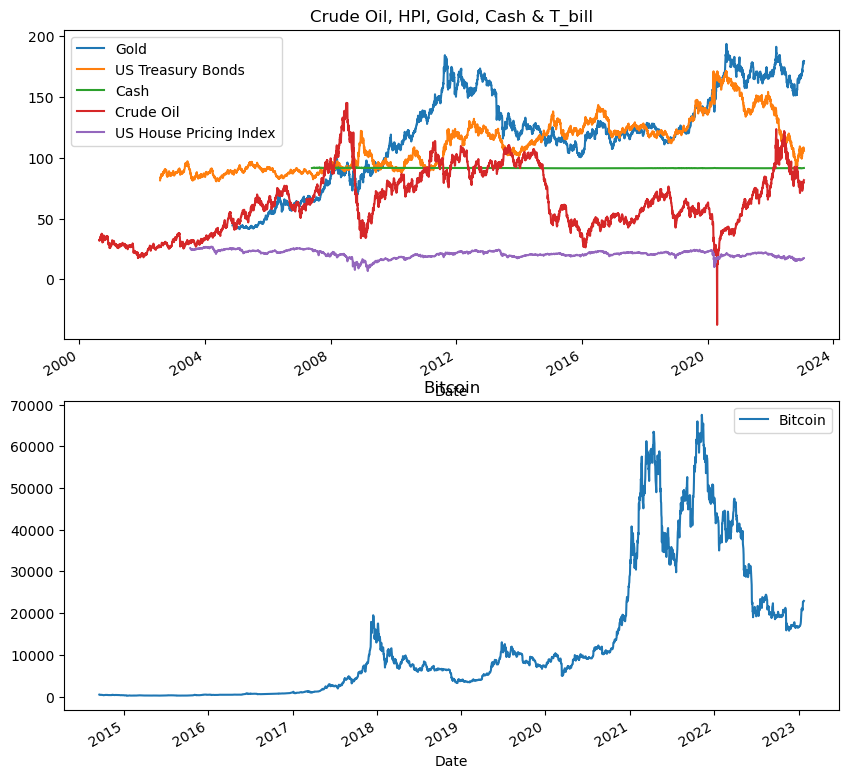

In [131]:
# Plot the closing prices for gold, US Treasury Bonds, cash, crude oil, Bitcoin, and US House Pricing Index
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# plot the gold data on the first axes
gold_data["Close"].plot(ax=ax1, label="Gold")
tlt_data["Close"].plot(ax=ax1, label="US Treasury Bonds")
bil_data["Close"].plot(ax=ax1, label="Cash")
oil_data["Close"].plot(ax=ax1, label="Crude Oil")
hpi_data["Close"].plot(ax=ax1, label="US House Pricing Index")
ax1.set_title("Crude Oil, HPI, Gold, Cash & T_bill")
ax1.legend()

# plot the bitcoin data on the second axes
btc_data["Close"].plot(ax=ax2, label="Bitcoin")
ax2.set_title("Bitcoin")
ax2.legend()

# display the charts
plt.show()